Import libraries and packages required 

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np 
import time
import random 
import warnings
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Load Data 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/

path = '/content/gdrive/My Drive/Colab Notebooks/prices-split-adjusted.csv'
data = pd.read_csv(path,index_col=0)
data_full = pd.read_csv(path)

Mounted at /content/gdrive
/content/gdrive/My Drive


IDA and EDA 

shape of data: (851264, 6)
Type of data: <class 'pandas.core.frame.DataFrame'>
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object
                open          close            low           high        volume
count  851264.000000  851264.000000  851264.000000  851264.000000  8.512640e+05
mean       64.993618      65.011913      64.336541      65.639748  5.415113e+06
std        75.203893      75.201216      74.459518      75.906861  1.249468e+07
min         1.660000       1.590000       1.500000       1.810000  0.000000e+00
25%        31.270000      31.292776      30.940001      31.620001  1.221500e+06
50%        48.459999      48.480000      47.970001      48.959999  2.476250e+06
75%        75.120003      75.139999      74.400002      75.849998  5.222500e+06
max      1584.439941    1578.130005    1549.939941    1600.930054  8.596434e+08
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: 

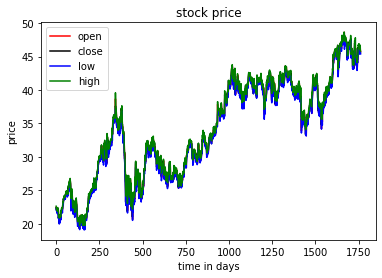

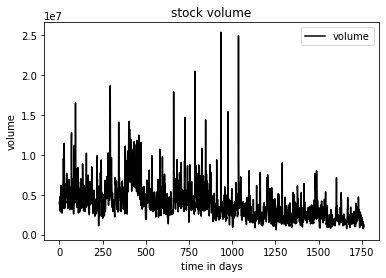

            open     close       low      high    volume
open    1.000000  0.997884  0.999037  0.999129 -0.507756
close   0.997884  1.000000  0.999131  0.999054 -0.511523
low     0.999037  0.999131  1.000000  0.998915 -0.520450
high    0.999129  0.999054  0.998915  1.000000 -0.497851
volume -0.507756 -0.511523 -0.520450 -0.497851  1.000000


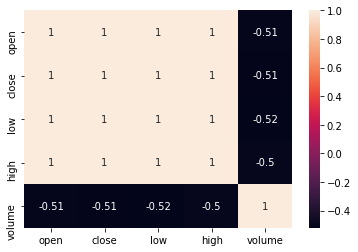

In [ ]:
# print(data.head())
print('shape of data:',data.shape)
print('Type of data:',type(data))
print(data.dtypes)
print(data.describe())

# Check for missing values 
print(data.isnull().sum())

# Check the number of companies 
print(data.symbol.nunique())
print(data.symbol.value_counts())

# Group data based on the company
data_grouped = data.groupby('symbol')
print(data_grouped.mean())

# EDA for a single company stocks
temp = data[data.symbol=='A']
# print(temp)
plt.plot(temp['open'].values, color='red', label='open')
plt.plot(temp['close'].values, color='black', label='close')
plt.plot(temp['low'].values, color='blue', label='low')
plt.plot(temp['high'].values, color='green', label='high')
plt.title('stock price')
plt.xlabel('time in days')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

plt.plot(temp['volume'].values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time in days')
plt.ylabel('volume')
plt.legend(loc='best')
plt.show()

relation = temp.corr()
print(relation)
sn.heatmap(relation,annot=True)
plt.show()

Choosing Stock and dividing stock data to train and test

In [ ]:
# Selecting one stock from the data of stocks
stocks = dict(tuple(data_grouped))
random.seed(123)
stock = random.choice(list(stocks))
# print(stock)
stock_data = stocks[stock]
# print(stock_data)

# Dividing data to 80% training data and 20% test data
training_idx = int(0.8 * stock_data.shape[0])
training_data = stock_data[:training_idx]
testing_data = stock_data[training_idx:]

print(training_data.shape)
print(testing_data.shape)
# print(training_data)
# print(testing_data)

(1409, 6)
(353, 6)


Pre Processing and Data Preparation

In [ ]:
# Remove the symbol of stock from the chosen stock data 
training_data.drop(['symbol'],axis=1,inplace=True)
testing_data.drop(['symbol'],axis=1,inplace=True)
# print(training_data)
# print(testing_data)

# Function to Normalize the data
def normalize(train_data,test_data):
  scaler = preprocessing.MinMaxScaler()
  scaler.fit(train_data)
  train_data_transform = scaler.transform(train_data)
  test_data_transform = scaler.transform(test_data)
  return train_data_transform, test_data_transform

# def standardize(df):
#   scaler = preprocessing.StandardScaler()
#   standardized_data = scaler.fit_transform(df)
#   return standardized_data

training_data_preprocessed,testing_data_preprocessed = normalize(training_data,testing_data)
# print(training_data_preprocessed)
# print(testing_data_preprocessed)

# Preparing data to train and test in models
x_train = training_data_preprocessed[:, [0,2,3,4]]
y_train = training_data_preprocessed[:,[1]]
x_test = testing_data_preprocessed[:, [0,2,3,4]]
y_test = testing_data_preprocessed[:,[1]]
# print('x_train.shape = ',x_train.shape)
# print('y_train.shape = ', y_train.shape)
# print('x_test.shape = ', x_test.shape)
# print('y_test.shape = ',y_test.shape)

warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Support Vector Machine - SVM 

Model Performance with default parameters
Default parameters of SVM: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Coefficient of determination: -0.44
RSS: 3285.69
Execution time in seconds:0.0070
----------------------------------------------------------------------
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    2.7s


Tuning/Training time in seconds: 72.99620294570923
Best parameters of SVM after tuning: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Model Performance with best parameters obtained after tuning
Best parameters of SVM after tuning: {'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Coefficient of determination: 0.16
RSS: 2187.33
Execution time in seconds:0.0041


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.2min finished


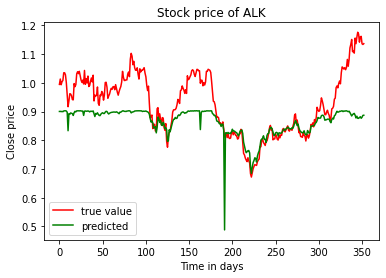

In [ ]:
# SVM with default parameters 
start = time.time()
svm_model_default = SVR()
svm_model_default.fit(x_train,y_train)
svm_preds = svm_model_default.predict(x_test)
svm_rsquared_train = svm_model_default.score(x_train,y_train)
svm_rsquared_test = svm_model_default.score(x_test,y_test)
svm_rss = ((y_test - svm_preds) ** 2).sum()
svm_mse = mean_squared_error(y_test, svm_preds)
end = time.time()
svm_execution_time = end - start 

print('Model Performance with default parameters')
print('Default parameters of SVM:',svm_model_default.get_params())
print('Coefficient of determination: %.2f' % svm_rsquared_test)
# print('Mean squared error: %.2f' % svm_mse)
print('RSS: %.2f' % svm_rss)
print('Execution time in seconds:{:0.4f}'.format(svm_execution_time))
print('----------------------------------------------------------------------')

# Hyper parameters to tune 
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale','auto',0.01,0.1,1]
C = [0.01,0.1,1,10]
grid_parameters = {'kernel': kernel,'gamma': gamma,'C': C}

# Parameter tuning using grid search 
start = time.time()
svm_model = SVR()
svm_model_grid = GridSearchCV(svm_model,grid_parameters,n_jobs=-1,cv=5,refit=True,verbose=2)
svm_model_grid.fit(x_train,y_train)
end = time.time()
svm_tuning_time = end-start 
best_parameters = svm_model_grid.best_params_
print('Tuning/Training time in seconds:',svm_tuning_time)
print('Best parameters of SVM after tuning:',best_parameters)

# Testing with best params obtained from grid search
start = time.time()
svm_best_model = SVR(kernel='rbf',gamma=1, C=1)
svm_best_model.fit(x_train,y_train)
svm_best_model_preds = svm_best_model.predict(x_test)
svm_tuned_rsquared_train = svm_best_model.score(x_train,y_train)
svm_tuned_rsquared_test = svm_best_model.score(x_test,y_test)
svm_tuned_rss = ((y_test - svm_best_model_preds) ** 2).sum()
svm_tuned_mse = mean_squared_error(y_test, svm_model_preds)
end = time.time()
svm_tuned_execution_time = end - start 

print('Model Performance with best parameters obtained after tuning')
print('Best parameters of SVM after tuning:',svm_best_model.get_params())
print('Coefficient of determination: %.2f' % svm_tuned_rsquared_test)
# print('Mean squared error: %.2f' % svm_tuned_mse)
print('RSS: %.2f' % svm_tuned_rss)
print('Execution time in seconds:{:0.4f}'.format(svm_tuned_execution_time))

plt.plot(y_test,color='red',label='true value')
plt.plot(svm_model_preds, color='green',label='predicted')
plt.title('Stock price of {}'.format(stock))
plt.xlabel('Time in days')
plt.ylabel('Close price')
plt.legend(loc='best')
plt.show()

Comparison / Experimentation Plots for SVM parameters 

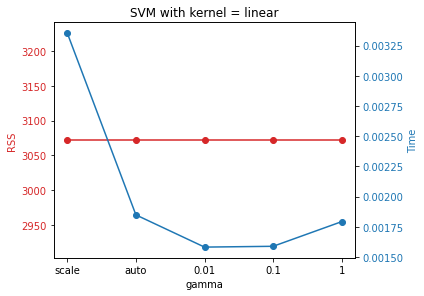

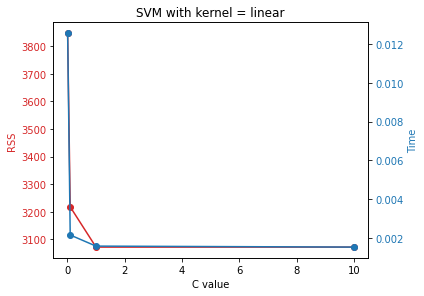

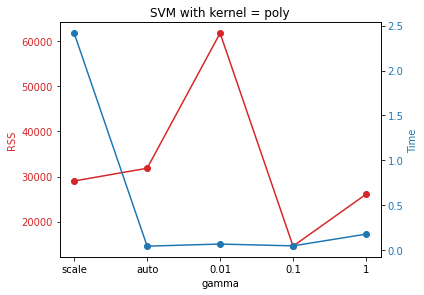

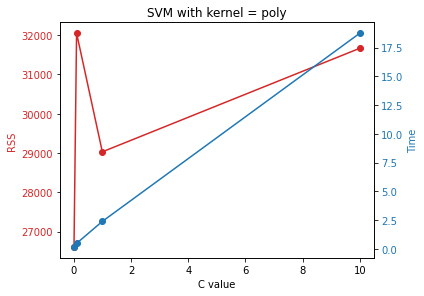

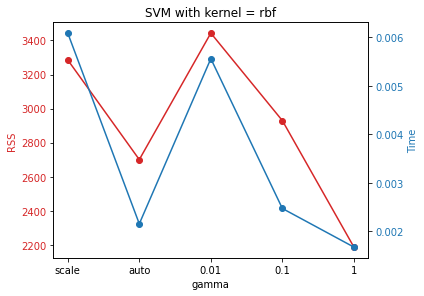

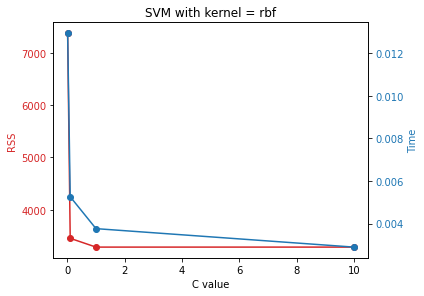

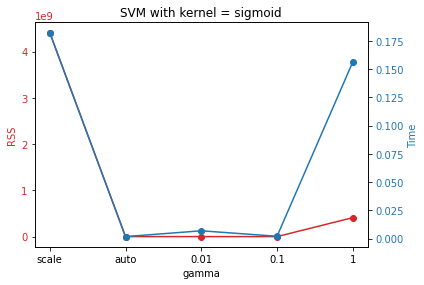

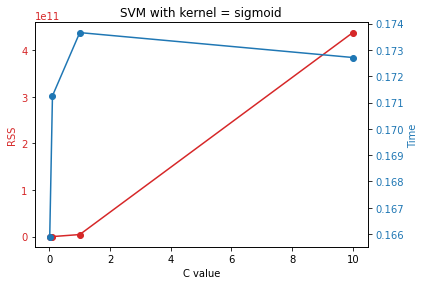

In [ ]:
import time
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_val = ['scale','auto',0.01,0.1,1]
C_val = [0.01,0.1,1,10]

for kernel_val in kernel :
  RSS = []
  time_values = []
  for value in gamma_val: 
    start = time.time()
    svm = SVR(kernel = kernel_val,gamma = value)
    svm.fit(x_train,y_train)
    preds = svm.predict(x_test)
    rss = ((y_test - preds) ** 2).sum()
    end = time.time()
    exec_time = end - start
    RSS.append(rss)
    time_values.append(exec_time)
  # print(RSS_linear)
  # print(time_linear)
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel('gamma')
  ax1.set_ylabel('RSS', color=color)
  ax1.plot(gamma_val, RSS, color=color,marker='o')
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  
  color = 'tab:blue'
  ax2.set_ylabel('Time', color=color) 
  ax2.plot(gamma_val, time_values, color=color,marker='o')
  ax2.tick_params(axis='y', labelcolor=color)
  fig.tight_layout() 
  plt.title('SVM with kernel = {}'.format(kernel_val))
  plt.show()

  RSS = []
  time_values = []
  for value in C_val: 
    start = time.time()
    svm = SVR(kernel = kernel_val,C = value)
    svm.fit(x_train,y_train)
    preds = svm.predict(x_test)
    rss = ((y_test - preds) ** 2).sum()
    end = time.time()
    exec_time = end - start
    RSS.append(rss)
    time_values.append(exec_time)
  # print(RSS_linear)
  # print(time_linear)
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel('C value')
  ax1.set_ylabel('RSS', color=color)
  ax1.plot(C_val, RSS, color=color,marker='o')
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  
  color = 'tab:blue'
  ax2.set_ylabel('Time in seconds', color=color) 
  ax2.plot(C_val, time_values, color=color,marker='o')
  ax2.tick_params(axis='y', labelcolor=color)
  fig.tight_layout() 
  plt.title('SVM with kernel = {}'.format(kernel_val))
  plt.show()

Random Forest

In [ ]:
# Random Forest with default parameters i.e. No tuning 
start = time.time()
rf_model_default = RandomForestRegressor()
rf_model_default.fit(x_train,y_train)
rf_preds = rf_model_default.predict(x_test)
rf_rsquared_train = rf_model_default.score(x_train,y_train)
rf_rsquared_test = rf_model_default.score(x_test,y_test)
rf_rss = ((y_test - rf_preds) ** 2).sum()
rf_mse = mean_squared_error(y_test, rf_preds)
end = time.time()
rf_execution_time = end - start 

print('Model Performance')
print('Default parameters of Random Forest:',rf_model_default.get_params())
print('Coefficient of determination: %.2f' % rf_rsquared_test)
# print('Mean squared error: %.2f' % rf_mse)
print('RSS: %.2f' % rf_rss)
print('Execution time in seconds:{:0.4f}'.format(rf_execution_time))
print('----------------------------------------------------------------------------')

Model Performance
Default parameters of Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Coefficient of determination: 0.84
RSS: 2328.62
Execution time in seconds:0.5122
----------------------------------------------------------------------------


Parameter Tuning 

In [ ]:
# Parameters to tune :
  # n_estimators = number of trees in the foreset
  # max_depth = max number of levels in each decision tree
  # min_samples_split = min number of data points placed in a node before the node is split
  # min_samples_leaf = min number of data points allowed in a leaf node
  # bootstrap = method for sampling data points (with or without replacement)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 19)]
min_samples_leaf = [1,2,4,5,10,50,100]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2,5,10,15,100]
bootstrap = [True, False]

grid_random = {'n_estimators': n_estimators,
               'min_samples_leaf': min_samples_leaf,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
# print(grid_random)

# Parameter tuning using random search 
start = time.time()
rf_model = RandomForestRegressor()
# rf_model_grid = GridSearchCV(rf_model,grid,n_jobs=-1,cv=5,refit=True,verbose=2)
rf_model_random = RandomizedSearchCV(estimator = rf_model, param_distributions = grid_random, 
                               n_iter = 100, cv = 3, n_jobs = -1,random_state = 42)
rf_model_random.fit(x_train,y_train)
end = time.time()
rf_tuning_time = end-start 
best_parameters = rf_model_random.best_params_
print('Tuning/Training time :',time.strftime("%H:%M:%S", time.gmtime(rf_tuning_time)))
print('Best parameters of Random Forest after tuning:',best_parameters)
print('Training score:',rf_model_random.score(x_train,y_train))


Model Performance
Default parameters of Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Coefficient of determination: 0.84
RSS: 2335.49
Execution time in seconds:0.4883
----------------------------------------------------------------------------
Tuning/Training time : 00:11:39
Best parameters of Random Forest after tuning: {'n_estimators': 1100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}


Testing using best parameters

Model performance after tuning
Best parameters of Random Forest after tuning: {'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Coefficient of determination: 0.84
RSS: 2370.13
Execution time in seconds: 6.745392560958862


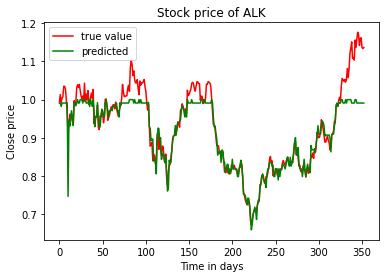

In [ ]:
start = time.time()
rf_best_model = RandomForestRegressor(n_estimators = 1100,
                min_samples_leaf = 1,
                max_depth = 10,
                min_samples_split = 2,
                bootstrap = False)
rf_best_model.fit(x_train,y_train)
rf_best_model_preds = rf_best_model.predict(x_test)
rf_tuned_rsquared_train = rf_best_model.score(x_train,y_train)
rf_tuned_rsquared_test = rf_best_model.score(x_test,y_test)
rf_tuned_rss = ((y_test - rf_best_model_preds) ** 2).sum()
rf_tuned_mse = mean_squared_error(y_test, rf_best_model_preds)
end = time.time()
rf_tuned_execution_time = end - start

print('Model performance after tuning')
print('Best parameters of Random Forest after tuning:',rf_best_model.get_params())
print('Coefficient of determination: %.2f' % rf_tuned_rsquared_test)
# print('Mean squared error: %.2f' % rf_tuned_mse)
print('RSS: %.2f' % rf_tuned_rss)
print('Execution time in seconds:',rf_tuned_execution_time)

plt.plot(y_test,color='red',label='true value')
plt.plot(rf_best_model_preds, color='green',label='predicted')
plt.title('Stock price of {}'.format(stock))
plt.xlabel('Time in days')
plt.ylabel('Close price')
plt.legend(loc='best')
plt.show()

Comparison/Experimentation Plots for Random Forest Parameters

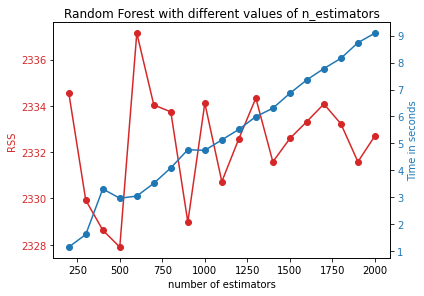

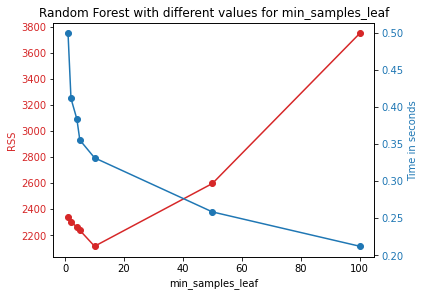

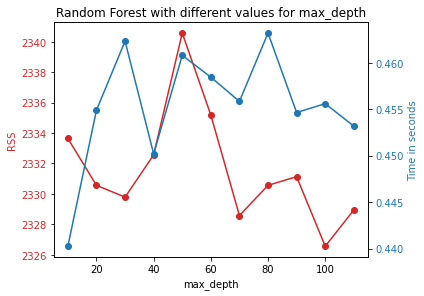

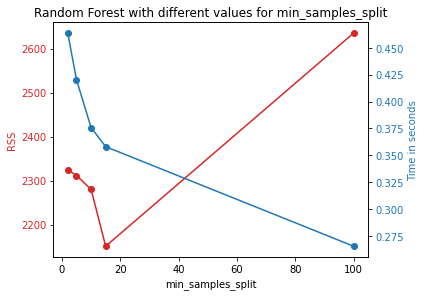

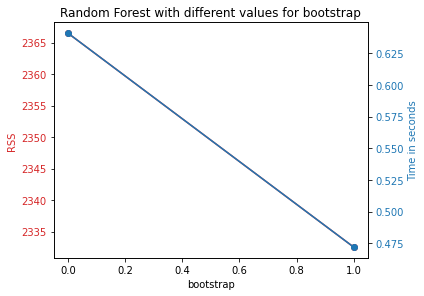

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 19)]
min_samples_leaf = [1,2,4,5,10,50,100]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2,5,10,15,100]
bootstrap = [True, False]

# Plot for varying number of estimators
RSS = []
time_values = []
for value in n_estimators:
  start = time.time()
  rf = RandomForestRegressor(n_estimators=value)
  rf.fit(x_train,y_train)
  preds_rf = rf.predict(x_test)
  rss = ((y_test - preds_rf) ** 2).sum()
  end = time.time()
  exec_time = end - start 
  RSS.append(rss)
  time_values.append(exec_time)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('number of estimators')
ax1.set_ylabel('RSS', color=color)
ax1.plot(n_estimators, RSS, color=color,marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Time in seconds', color=color) 
ax2.plot(n_estimators, time_values, color=color,marker='o')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout() 
plt.title('Random Forest with different values of n_estimators')
plt.show()

# Plot for varying number of min_samples_leaf
RSS = []
time_values = []
for value in min_samples_leaf:
  start = time.time()
  rf = RandomForestRegressor(min_samples_leaf=value)
  rf.fit(x_train,y_train)
  preds_rf = rf.predict(x_test)
  rss = ((y_test - preds_rf) ** 2).sum()
  end = time.time()
  exec_time = end - start 
  RSS.append(rss)
  time_values.append(exec_time)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('min_samples_leaf')
ax1.set_ylabel('RSS', color=color)
ax1.plot(min_samples_leaf, RSS, color=color,marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Time in seconds', color=color) 
ax2.plot(min_samples_leaf, time_values, color=color,marker='o')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout() 
plt.title('Random Forest with different values for min_samples_leaf')
plt.show()

# Plot for varying number of max_depth
RSS = []
time_values = []
for value in max_depth:
  start = time.time()
  rf = RandomForestRegressor(max_depth=value)
  rf.fit(x_train,y_train)
  preds_rf = rf.predict(x_test)
  rss = ((y_test - preds_rf) ** 2).sum()
  end = time.time()
  exec_time = end - start 
  RSS.append(rss)
  time_values.append(exec_time)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('max_depth')
ax1.set_ylabel('RSS', color=color)
ax1.plot(max_depth, RSS, color=color,marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Time in seconds', color=color) 
ax2.plot(max_depth, time_values, color=color,marker='o')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout() 
plt.title('Random Forest with different values for max_depth')
plt.show()

# Plot for varying number of min_samples_split
RSS = []
time_values = []
for value in min_samples_split:
  start = time.time()
  rf = RandomForestRegressor(min_samples_split=value)
  rf.fit(x_train,y_train)
  preds_rf = rf.predict(x_test)
  rss = ((y_test - preds_rf) ** 2).sum()
  end = time.time()
  exec_time = end - start 
  RSS.append(rss)
  time_values.append(exec_time)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('min_samples_split')
ax1.set_ylabel('RSS', color=color)
ax1.plot(min_samples_split, RSS, color=color,marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Time in seconds', color=color) 
ax2.plot(min_samples_split, time_values, color=color,marker='o')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout() 
plt.title('Random Forest with different values for min_samples_split')
plt.show()

# Plot for different bootstrap
RSS = []
time_values = []
for value in bootstrap:
  start = time.time()
  rf = RandomForestRegressor(bootstrap=value)
  rf.fit(x_train,y_train)
  preds_rf = rf.predict(x_test)
  rss = ((y_test - preds_rf) ** 2).sum()
  end = time.time()
  exec_time = end - start 
  RSS.append(rss)
  time_values.append(exec_time)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('bootstrap')
ax1.set_ylabel('RSS', color=color)
ax1.plot(bootstrap, RSS, color=color,marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Time in seconds', color=color) 
ax2.plot(bootstrap, time_values, color=color,marker='o')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout() 
plt.title('Random Forest with different values for bootstrap')
plt.show()

Comparison between algorithms

In [ ]:
from astropy.table import  Table, Column

data_rows = [('SVM (default parameters)', round(svm_rss,2), round(svm_rsquared_test,2),round(svm_execution_time,4)),
             ('SVM (tuned)', round(svm_tuned_rss,2), round(svm_tuned_rsquared_test,2),round(svm_tuned_execution_time,4)),
             ('Random Forest (default parameters)', round(rf_rss,2), round(rf_rsquared_test,2),round(rf_execution_time,4)),
             ('Random Forest (tuned)', round(rf_tuned_rss,2), round(rf_tuned_rsquared_test,2),round(rf_tuned_execution_time,4))]
t = Table(rows=data_rows, names=('Algorithm', 'Residual Sum of Square', 'Co-efficient of determination','Execution Time in seconds'))

t.pprint_all()

            Algorithm              Residual Sum of Square Co-efficient of determination Execution Time in seconds
---------------------------------- ---------------------- ----------------------------- -------------------------
          SVM (default parameters)                3285.69                         -0.44                     0.006
                       SVM (tuned)                2187.33                          0.16                    0.0045
Random Forest (default parameters)                2328.62                          0.84                    0.5122
             Random Forest (tuned)                2368.53                          0.84                     6.668
